<a href="https://colab.research.google.com/github/AKShaffer/Group-2---Generative-AI-Tools-for-Drug-Repurposing-for-PD/blob/main/Visualizing_SMILES_molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Install and import dependencies
!pip -q install rdkit-pypi
!pip -q install Pillow
!pip -q install rdkit

'''
os: For interacting with the operating system.
io: For handling input and output operations.
sys: For system-specific parameters and functions.
google.colab, drive: Libraries specific to Google Colaboratory, used for mounting Google Drive to access files.
BytesIO: From the io module, for working with in-memory byte streams.
csv: For reading and writing CSV (Comma-Separated Values) files.
PIL, Image: Pillow (PIL) library for image manipulation.
os.environ["KERAS_BACKEND"] = "tensorflow": Sets the backend for Keras, a deep learning library, to TensorFlow.
ipywidgets, widgets: For creating interactive widgets in Jupyter notebooks.
IPython, get_ipython, display: IPython functionalities for interactive computing and display in Jupyter notebooks.
rdkit, Chem, RDLogger, etc.: RDKit, a cheminformatics library for working with chemical data, molecules, and their properties.
RDLogger.DisableLog("rdApp.*"): Disables specific RDKit logs to reduce output clutter.
'''
from google.colab import drive
drive.mount('/content/drive')
import csv

from PIL import Image

import ipywidgets as widgets
from IPython import get_ipython
from IPython.display import display

import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw, MolToSmiles, QED
from rdkit.Chem.Draw import MolsToGridImage

RDLogger.DisableLog("rdApp.*")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


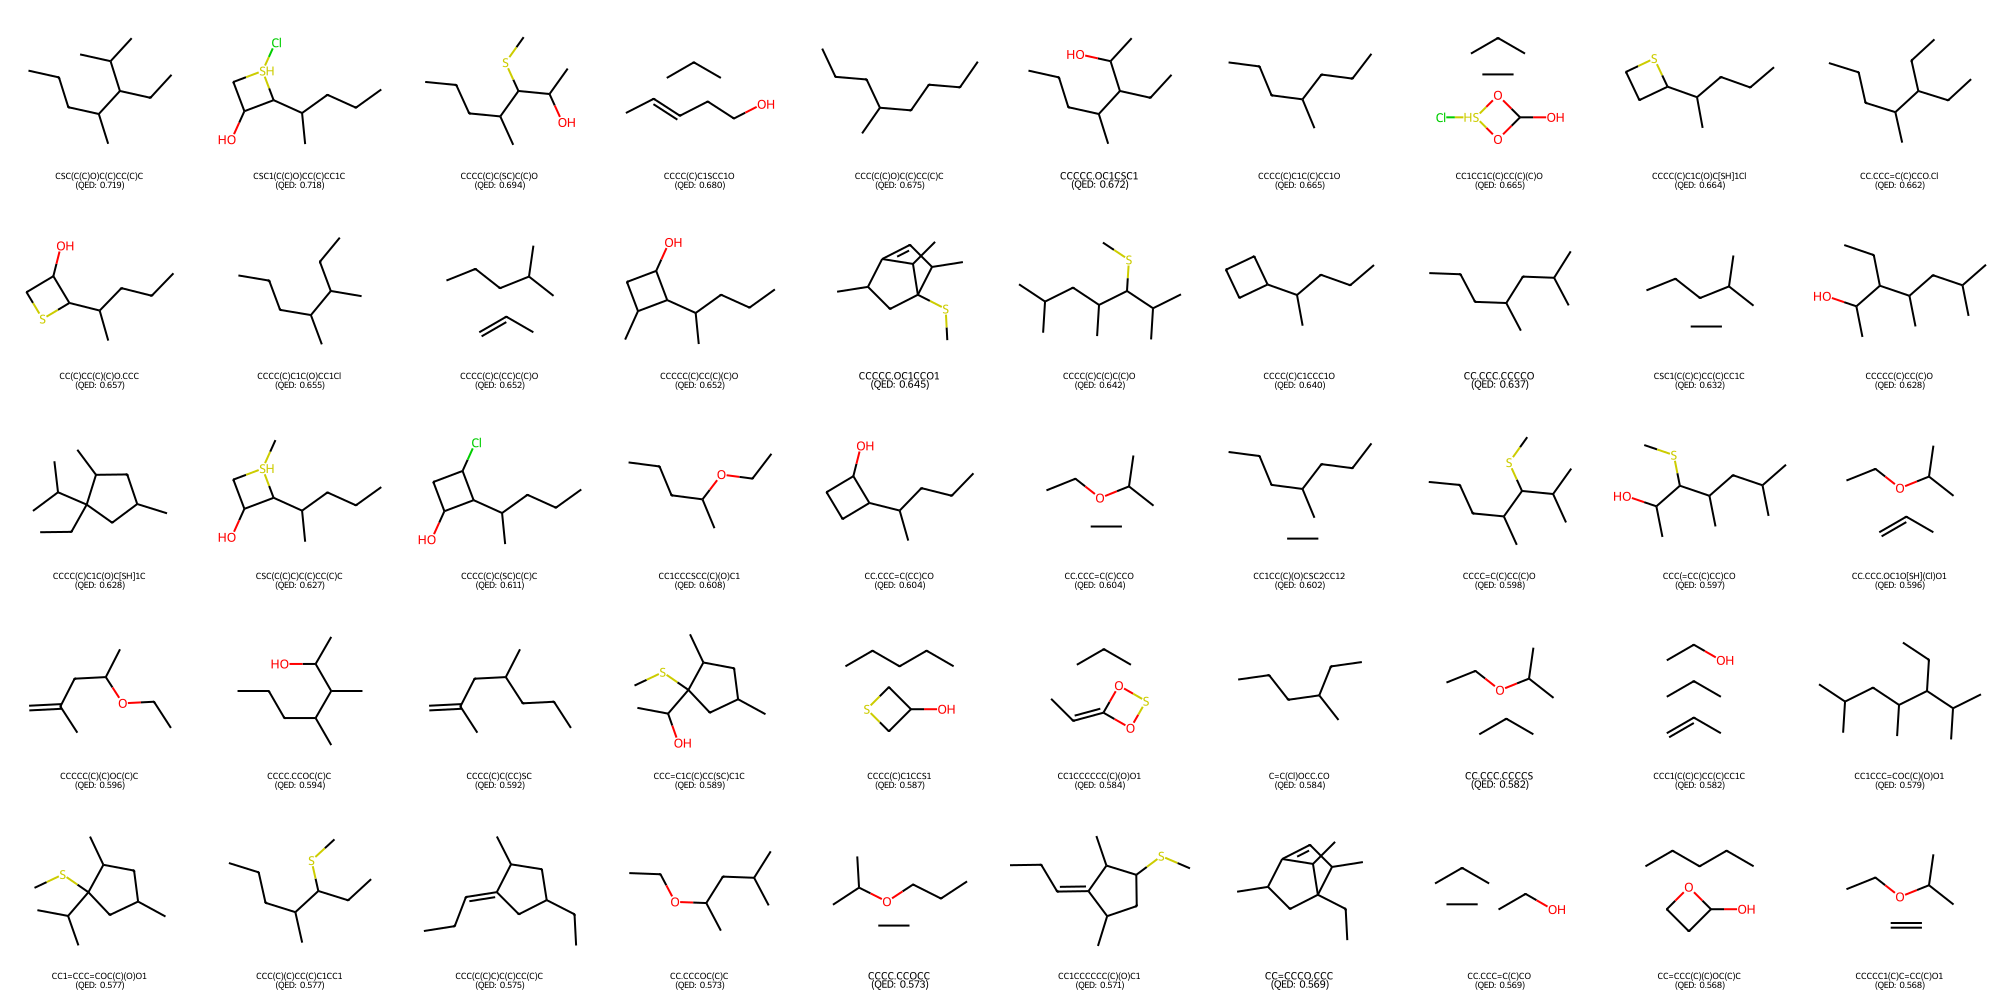

Text(value='my_molecules.png', description='Filename:')

Button(description='Save Image', style=ButtonStyle())

In [22]:
# Download dataset

# Change the file path so that it points to your data file with smiles.
csv_path = '/content/drive/My Drive/VAE_GAN_Colab_Notebooks/Data/GAN generated smiles.csv'

df = []
with open(csv_path, "r") as f:
    # Create a csv reader object
    reader = csv.reader(f)
    # Skip the header row using next()
    next(reader)

    for row in reader:
        # Append the first element (SMILES string) to the list
        smiles = row[0].strip()
        df.append(smiles)

# Convert the list of SMILES strings to RDKit molecules
molecules = [Chem.MolFromSmiles(s) for s in df]

def save_image(b):
    img_filename = filename_widget.value
    img_to_save = Image.open(io.BytesIO(pil_img.data))
    img_to_save.save(img_filename) # call 'save' on PIL Image, this will overwrite the existing file if it has the same name.

    print(f"Image saved as {img_filename}")

# Generate SMILES legends for smiles molecules
legends = []
for m in molecules:
     if m is not None:
       smiles = Chem.MolToSmiles(m)
       qed_value = QED.qed(m)  # Calculate QED
       legend = f"{smiles} \n(QED: {qed_value:.3f})"  # Format legend with QED
       legends.append((legend, qed_value))

# Sort legends by QED value in descending order
legends.sort(key=lambda item: item[1], reverse=True)

# Extract legends after sorting
legends = [item[0] for item in legends]

# Create a text box widget for filename input
filename_widget = widgets.Text(value="my_molecules.png", description="Filename:")

# Generate SMILES legends for valid molecules
#legends = [Chem.MolToSmiles(m) for m in molecules if m is not None]

# Create and display visualization of the smiles
pil_img = MolsToGridImage(
    molecules, molsPerRow=10, legends=legends
)

display(pil_img)
display(filename_widget)

# Create a button to trigger saving
save_button = widgets.Button(description="Save Image")
save_button.on_click(save_image)
display(save_button)